In [ ]:
install.packages("fable")
install.packages("forecast")
install.packages("tsibble")
install.packages("tidyverse")
install.packages("lubridate")
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
suppressMessages(library(tidyverse))
suppressMessages(library(tsibble))
suppressMessages(library(fable))
suppressMessages(library(lubridate))
suppressMessages(library(scales))
suppressMessages(library(forecast))

In [ ]:
sales <- read.csv("iPhone Sales.csv")

In [ ]:
sales %>% head()

,TimePeriod,Sales,Units,SalesPerUnit
,<chr>,<int>,<dbl>,<dbl>
1,2007Q3,5,0.27,18.51852
2,2007Q4,118,1.12,105.35714
3,2008Q1,241,2.32,103.87931
4,2008Q2,378,1.70,222.35294
5,2008Q3,419,0.72,581.94444
6,2008Q4,806,6.89,116.98113


In [ ]:
sales %>% tail()

,TimePeriod,Sales,Units,SalesPerUnit
,<chr>,<int>,<dbl>,<dbl>
61,2022Q3,40665,NA,NA
62,2022Q4,42626,NA,NA
63,2023Q1,65775,NA,NA
64,2023Q2,51334,NA,NA
65,2023Q3,39669,NA,NA
66,2023Q4,43805,NA,NA


In [ ]:
library(zoo)
sales$TimePeriod <- as.Date(as.yearqtr(sales$TimePeriod))

In [ ]:
sales %>% head()

,TimePeriod,Sales,Units,SalesPerUnit
,<date>,<int>,<dbl>,<dbl>
1,2007-07-01,5,0.27,18.51852
2,2007-10-01,118,1.12,105.35714
3,2008-01-01,241,2.32,103.87931
4,2008-04-01,378,1.70,222.35294
5,2008-07-01,419,0.72,581.94444
6,2008-10-01,806,6.89,116.98113


In [ ]:
sales %>% tail()

,TimePeriod,Sales,Units,SalesPerUnit
,<date>,<int>,<dbl>,<dbl>
61,2022-07-01,40665,NA,NA
62,2022-10-01,42626,NA,NA
63,2023-01-01,65775,NA,NA
64,2023-04-01,51334,NA,NA
65,2023-07-01,39669,NA,NA
66,2023-10-01,43805,NA,NA


In [ ]:
sales_ts <- as_tsibble(sales)

Using `TimePeriod` as index variable.


In [ ]:
sales_ts |> head()

TimePeriod,Sales,Units,SalesPerUnit
<date>,<int>,<dbl>,<dbl>
2007-07-01,5,0.27,18.51852
2007-10-01,118,1.12,105.35714
2008-01-01,241,2.32,103.87931
2008-04-01,378,1.70,222.35294
2008-07-01,419,0.72,581.94444
2008-10-01,806,6.89,116.98113


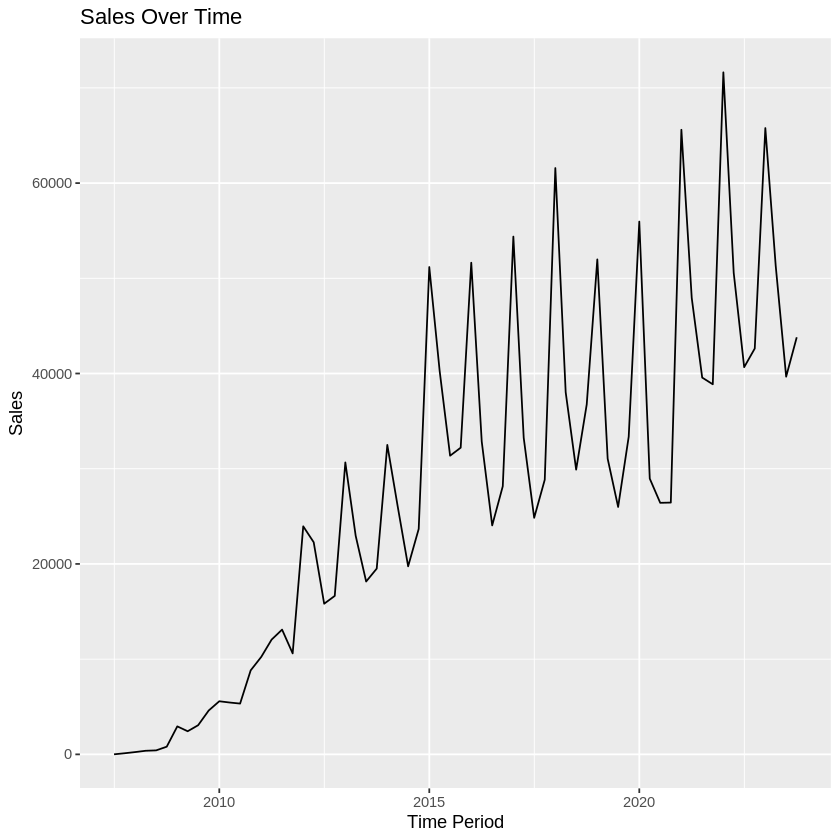

In [ ]:
ggplot(sales_ts, aes(x = TimePeriod, y = Sales)) +
  geom_line() +
  labs(x = "Time Period", y = "Sales") +
  ggtitle("Sales Over Time")

The trend of the Sales is going steadily up, even during the Covid era the trend is increasing and it shows seasonality.

Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_line()`).”


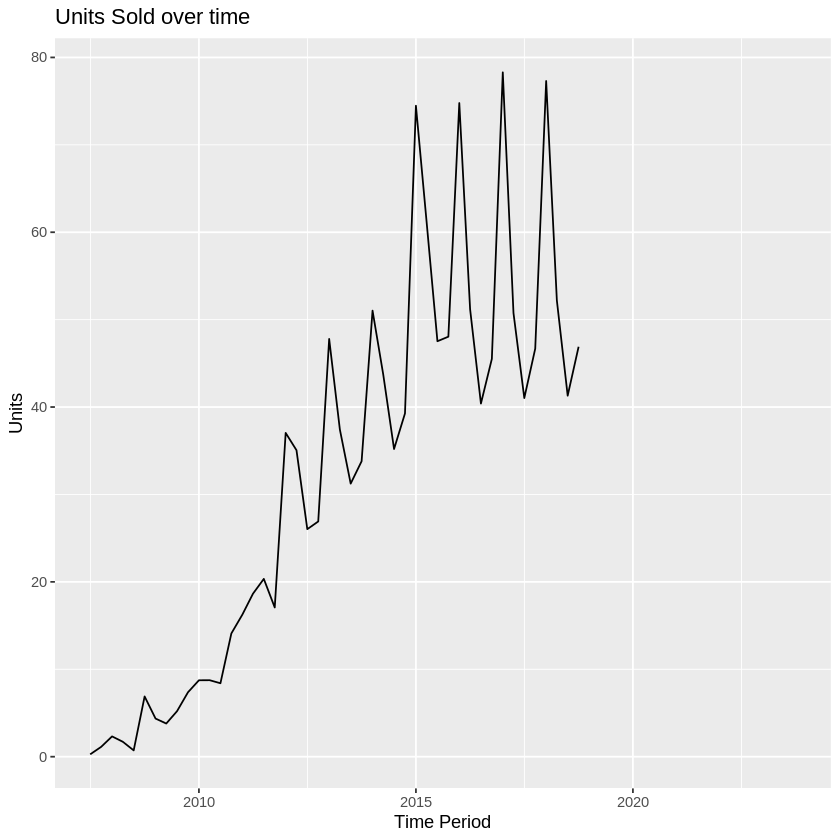

In [ ]:
ggplot(sales_ts, aes(x = TimePeriod, y = Units)) +
  geom_line() +
  labs(x = "Time Period", y = "Units") +
  ggtitle("Units Sold over time")

Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_line()`).”


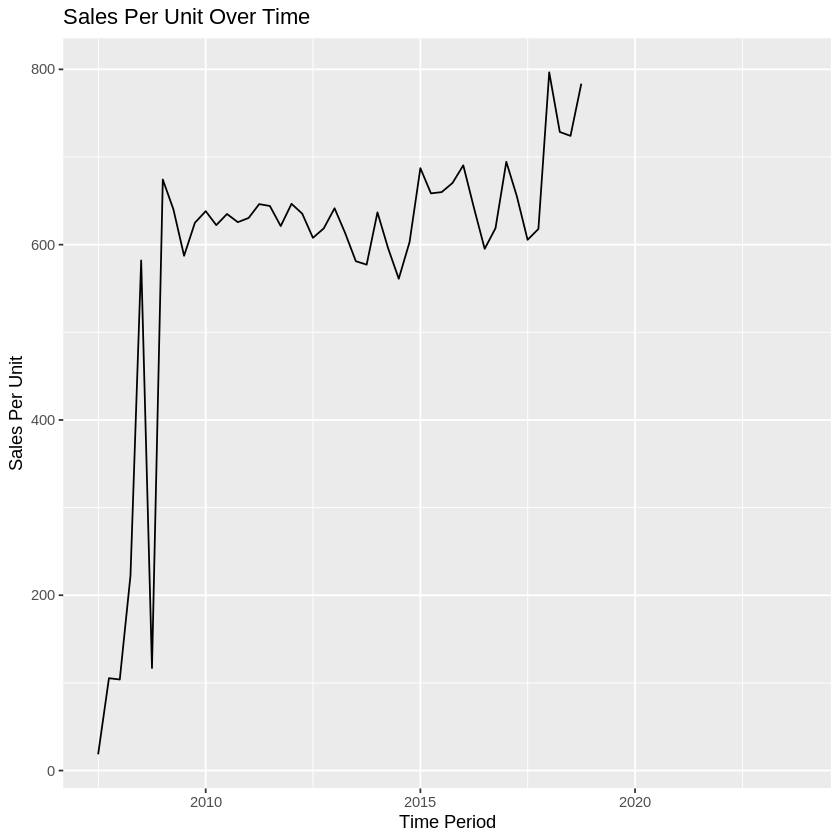

In [ ]:
ggplot(sales_ts, aes(x = TimePeriod, y = SalesPerUnit)) +
  geom_line() +
  labs(x = "Time Period", y = "Sales Per Unit") +
  ggtitle("Sales Per Unit Over Time")

In [ ]:
library(tsibble)
library(fable)
library(ggplot2)
#try this in RStudio
stl_model <- sales_ts |> model(STL(Sales ~ trend() + season()))

autoplot(stl_model) + labs(title = "STL Decomposition of Claims")

ERROR: Error in UseMethod("model"): no applicable method for 'model' applied to an object of class "c('tbl_df', 'tbl', 'data.frame')"


In [ ]:
sales_filtered <- sales_ts %>%
  filter(year(TimePeriod) <= 2018)

head(sales_filtered)

TimePeriod,Sales,Units,SalesPerUnit
<date>,<int>,<dbl>,<dbl>
2007-07-01,5,0.27,18.51852
2007-10-01,118,1.12,105.35714
2008-01-01,241,2.32,103.87931
2008-04-01,378,1.70,222.35294
2008-07-01,419,0.72,581.94444
2008-10-01,806,6.89,116.98113


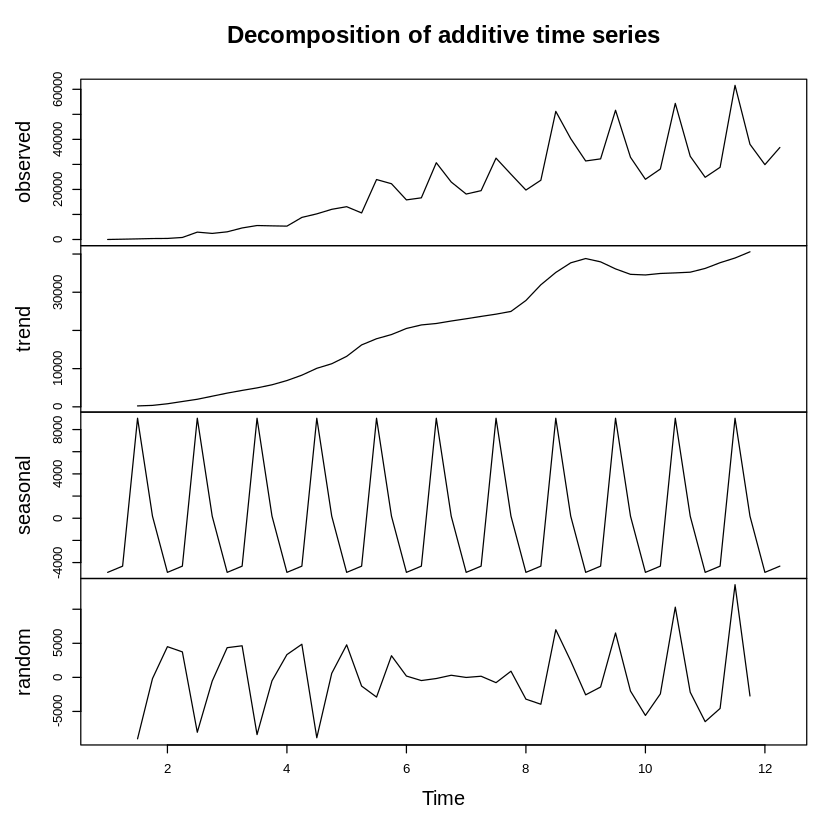

In [ ]:
sales_decompose <- ts(sales_filtered$Sales, frequency = 4)

decomposition <- decompose(sales_decompose)

plot(decomposition)

It is clear that the sales of IPhone has a seasonal component in it, with the trend component increasing over time.

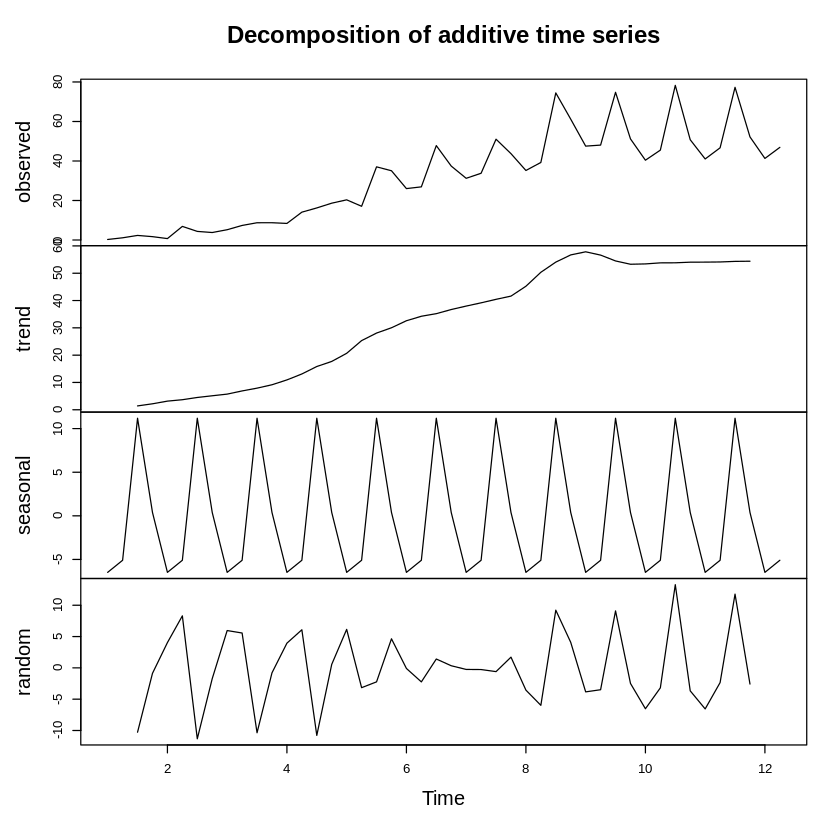

In [ ]:
units_decompose <- ts(sales_filtered$Units, frequency = 4)

decomposition <- decompose(units_decompose)

plot(decomposition)

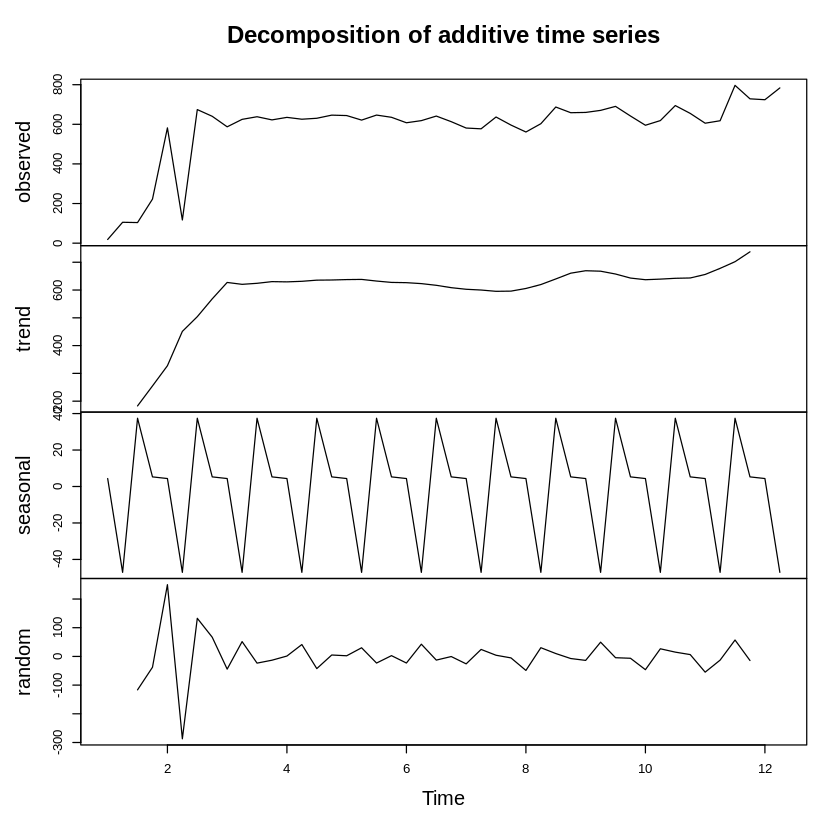

In [ ]:
salesperunit_decompose <- ts(sales_filtered$SalesPerUnit, frequency = 4)

decomposition <- decompose(salesperunit_decompose)

plot(decomposition)

In [ ]:
library(dplyr)
training <- sales_ts %>%
  filter(year(TimePeriod) <= 2018)

In [ ]:
library(dplyr)
testing <- sales_ts %>%
  filter(year(TimePeriod) >= 2019)

In [ ]:
training |> tail()

TimePeriod,Sales,Units,SalesPerUnit
<date>,<int>,<dbl>,<dbl>
2017-07-01,24846,41.03,605.5569
2017-10-01,28846,46.68,617.9520
2018-01-01,61576,77.30,796.5847
2018-04-01,38032,52.20,728.5824
2018-07-01,29906,41.30,724.1162
2018-10-01,36755,46.90,783.6887


In [ ]:
testing |> head()

TimePeriod,Sales,Units,SalesPerUnit
<date>,<int>,<dbl>,<dbl>
2019-01-01,51982,NA,NA
2019-04-01,31051,NA,NA
2019-07-01,25986,NA,NA
2019-10-01,33362,NA,NA
2020-01-01,55957,NA,NA
2020-04-01,28962,NA,NA


In [ ]:
sales_ts <- as_tibble(sales_ts)
print(class(sales_ts))

[1] "tbl_df"     "tbl"        "data.frame"


In [ ]:
library(ggplot2)

decomposed <- decompose(filtered_tibble, type = "multiplicative")

autoplot(decomposed$seasonal) +
  labs(title = 'Seasonal Plot on Differenced-Log', x = '', y = '')


ERROR: Error in decompose(filtered_tibble, type = "multiplicative"): time series has no or less than 2 periods


Filling missing values

In [ ]:
units <- as.ts(training)
models <- model( units,
    'Mean Model' = MEAN(Units),
    'NAIVE Model' = NAIVE(Units),
    'SNAIVE Model' = SNAIVE(Units ~ lag('1 year')),
    'Random Walk' = RW(Units ~ drift())
)

accuracy(units, models) |> select(.model, ME, RMSE, MAPE, ACF1)

ERROR: Error in UseMethod("model"): no applicable method for 'model' applied to an object of class "c('mts', 'ts', 'matrix', 'array')"


In [ ]:
library(dplyr)
library(tsibble)
library(lubridate)

sales_ts <- sales_ts %>%
  mutate(Date = as.Date(TimePeriod)) %>%
  as_tsibble(index = Date, key = "Sales")

training <- sales_ts %>%
  filter(year(Date) <= 2018)

testing <- sales_ts %>%
  filter(year(Date) >= 2019)

training_ts <- training %>%
  as_tsibble()

models <- model(training_ts,
                'Mean Model' = MEAN(Units),
                'NAIVE Model' = NAIVE(Units),
                'SNAIVE Model' = SNAIVE(Units ~ lag('1 year')),
                'Random Walk' = RW(Units ~ drift())
)

forecasted <- forecast(models, new_data = testing)

accuracy(training_ts, models) |> select(.model, ME, RMSE, MAPE, ACF1)

autoplot(forecasted)

Warning message:
“Non-integer lag orders for random walk models are not supported. Rounding to the nearest integer.”
Warning message:
“Non-integer lag orders for random walk models are not supported. Rounding to the nearest integer.”
Warning message:
“Non-integer lag orders for random walk models are not supported. Rounding to the nearest integer.”
Warning message:
“Non-integer lag orders for random walk models are not supported. Rounding to the nearest integer.”
Warning message:
“Non-integer lag orders for random walk models are not supported. Rounding to the nearest integer.”
Warning message:
“Non-integer lag orders for random walk models are not supported. Rounding to the nearest integer.”
Warning message:
“Non-integer lag orders for random walk models are not supported. Rounding to the nearest integer.”
Warning message:
“Non-integer lag orders for random walk models are not supported. Rounding to the nearest integer.”
Warning message:
“Non-integer lag orders for random walk models 

ERROR: Error in accuracy.default(training_ts, models): No accuracy method found for an object of class tbl_tsNo accuracy method found for an object of class tbl_dfNo accuracy method found for an object of class tblNo accuracy method found for an object of class data.frame


In [ ]:
print(models)

# A mable: 46 x 5
# Key:     Sales [46]
   Sales `Mean Model` `NAIVE Model` `SNAIVE Model` `Random Walk`
   <int>      <model>       <model>        <model>       <model>
 1     5       <MEAN>       <NAIVE>       <SNAIVE>  <NULL model>
 2   118       <MEAN>       <NAIVE>       <SNAIVE>  <NULL model>
 3   241       <MEAN>       <NAIVE>       <SNAIVE>  <NULL model>
 4   378       <MEAN>       <NAIVE>       <SNAIVE>  <NULL model>
 5   419       <MEAN>       <NAIVE>       <SNAIVE>  <NULL model>
 6   806       <MEAN>       <NAIVE>       <SNAIVE>  <NULL model>
 7  2427       <MEAN>       <NAIVE>       <SNAIVE>  <NULL model>
 8  2940       <MEAN>       <NAIVE>       <SNAIVE>  <NULL model>
 9  3060       <MEAN>       <NAIVE>       <SNAIVE>  <NULL model>
10  4606       <MEAN>       <NAIVE>       <SNAIVE>  <NULL model>
# ℹ 36 more rows


In [ ]:
colnames(training_ts)

[1] "TimePeriod"   "Sales"        "Units"        "SalesPerUnit" "Date"

In [ ]:
# Assuming 'sales_ts' is your tsibble containing the time series data
# Replace 'Sales' with the column name of your data containing the sales information

# Function to perform exponential smoothing
simple_exponential_smoothing <- function(x, alpha) {
  n <- length(x)
  s <- rep(NA, n)
  s[1] <- x[1]
  for (i in 2:n) {
    s[i] <- alpha * x[i] + (1 - alpha) * s[i - 1]
  }
  return(s)
}

# Set alpha (smoothing parameter)
alpha <- 0.2  # You can adjust this parameter based on your data characteristics

# Perform exponential smoothing on the Sales column
smoothed_sales <- simple_exponential_smoothing(sales_ts$Sales, alpha)

# Fill missing Units and SalesPerUnit based on smoothed sales
sales_ts$Units <- ifelse(is.na(sales_ts$Units), smoothed_sales / sales_ts$SalesPerUnit, sales_ts$Units)
sales_ts$SalesPerUnit <- ifelse(is.na(sales_ts$SalesPerUnit), sales_ts$Sales / smoothed_sales, sales_ts$SalesPerUnit)

# Print the updated tsibble
print(sales_ts)


# A tsibble: 66 x 5 [1D]
# Key:       Sales [66]
   TimePeriod Sales Units SalesPerUnit Date      
   <date>     <int> <dbl>        <dbl> <date>    
 1 2007-07-01     5  0.27         18.5 2007-07-01
 2 2007-10-01   118  1.12        105.  2007-10-01
 3 2008-01-01   241  2.32        104.  2008-01-01
 4 2008-04-01   378  1.7         222.  2008-04-01
 5 2008-07-01   419  0.72        582.  2008-07-01
 6 2008-10-01   806  6.89        117.  2008-10-01
 7 2009-04-01  2427  3.79        640.  2009-04-01
 8 2009-01-01  2940  4.36        674.  2009-01-01
 9 2009-07-01  3060  5.21        587.  2009-07-01
10 2009-10-01  4606  7.37        625.  2009-10-01
# ℹ 56 more rows


In [ ]:
head(sales_ts)

TimePeriod,Sales,Units,SalesPerUnit,Date
<date>,<int>,<dbl>,<dbl>,<date>
2017-01-01,54378,78.29,694.571465,2017-01-01
2020-01-01,55957,46017.24,1.102724,2020-01-01
2018-01-01,61576,77.30,796.584735,2018-01-01
2021-01-01,65597,46869.11,1.183038,2021-01-01
2023-01-01,65775,50289.39,1.143648,2023-01-01
2022-01-01,71628,50824.62,1.187147,2022-01-01
